# Importing pandas & pyplot

In [106]:
import pandas as pd

In [107]:
from matplotlib import pyplot as plt

In [108]:
print(pd.options.display.max_rows) 

60


# Importing OSSE sample data for analysis

In [109]:
osse_data = pd.read_csv('osse.csv')

In [110]:
df = pd.DataFrame(osse_data)

# Browsing the data to identify headers, data types, record counts, etc.

In [111]:
df.info

<bound method DataFrame.info of       uniqueid  lea_code  school_code  gender                       race  \
0      1001076       4.0           10  female  Black or African American   
1      1001077       4.0           10  male    Black or African American   
2      1001078       4.0           10  female  Black or African American   
3      1001079       4.0           10  male    Black or African American   
4      1001080       4.0           10  male           White or Caucasian   
...        ...       ...          ...     ...                        ...   
4643   1002252      19.0          430  female  Black or African American   
4644   1002253      19.0          430  male    Black or African American   
4645   1002254      19.0          430  male    Black or African American   
4646   1002255      19.0          430  male    Black or African American   
4647   1002256      19.0          430  male    Black or African American   

          ell_part special_ed At Risk  first_ninth_grad

# Observing unique values to identify anomalies

In [112]:
unique_lea_code = df['lea_code'].unique()
unique_school_code = df['school_code'].unique()
unique_gender = df['gender'].unique()
unique_race = df['race'].unique()
unique_ell_part = df['ell_part'].unique()
unique_special_ed = df['special_ed'].unique()
unique_at_risk = df['At Risk'].unique()
unique_first_ninth_grade_year = df['first_ninth_grade_year'].unique()
unique_cohort_status = df['cohort_status'].unique()
unique_graduated_4yr = df['graduated_4yr'].unique()

In [113]:
print(unique_lea_code)
print(unique_school_code)
print(unique_gender)
print(unique_race)
print(unique_ell_part)
print(unique_special_ed)
print(unique_at_risk)
print(unique_first_ninth_grade_year)
print(unique_cohort_status)
print(unique_graduated_4yr)

[ 4.  2.  3.  1.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. nan 17. 18.
 19.]
[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360
 370 380 390 400 410 420 430]
['female' 'male  ' 'trans']
['Black or African American' 'White or Caucasian' 'Latino or Hispanic'
 'Asian' 'Two or More Races' 'Native Hawaiian or Pacific Islander' 'AS7'
 'American Indian or Alaska Native' 'BL7']
['NO          ' 'YES         ']
['NO ' 'YES']
['YES' 'NO ']
[2015 2014 2016]
[1 0]
[0 1]


# Observed anomalies include blank LEA codes, incorrect race entries (AS7, BL7), students who did not start high school in 2015, and cohort status of zero.

In [114]:
blank_rows = df[df.isnull().any(axis=1)]

In [115]:
print(blank_rows)

      uniqueid  lea_code  school_code  gender                       race  \
4361   1002108       NaN          410  female  Black or African American   
4362   1002114       NaN          410  male    Black or African American   
4363   1002118       NaN          410  female  Black or African American   
4364   1002102       NaN          410  female  Black or African American   
4365   1002103       NaN          410  male           White or Caucasian   
...        ...       ...          ...     ...                        ...   
4431   1002440       NaN          410  male    Black or African American   
4432   1002441       NaN          410  female  Black or African American   
4433   1002101       NaN          410  male           White or Caucasian   
4434   1002100       NaN          410  male           Latino or Hispanic   
4435   1002116       NaN          410  female         White or Caucasian   

          ell_part special_ed At Risk  first_ninth_grade_year  cohort_status  \
4361  N

In [116]:
df = df.dropna()

In [117]:
df

,uniqueid,lea_code,school_code,gender,race,ell_part,special_ed,At Risk,first_ninth_grade_year,cohort_status,graduated_4yr
0,1001076,4.0,10,female,Black or African American,NO,NO,YES,2015,1,0
1,1001077,4.0,10,male,Black or African American,NO,NO,YES,2015,1,1
2,1001078,4.0,10,female,Black or African American,NO,NO,YES,2015,1,1
3,1001079,4.0,10,male,Black or African American,NO,NO,YES,2015,1,1
4,1001080,4.0,10,male,White or Caucasian,NO,NO,NO,2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4643,1002252,19.0,430,female,Black or African American,NO,NO,YES,2015,1,1
4644,1002253,19.0,430,male,Black or African American,NO,YES,YES,2015,1,1
4645,1002254,19.0,430,male,Black or African American,NO,NO,YES,2015,1,1
4646,1002255,19.0,430,male,Black or African American,NO,NO,YES,2015,1,0


# I have dropped records with blank rows. Now, I will take a closer look at each variable

# First I will check for duplicate unique IDs

In [118]:
duplicate_uniqueid = df ['uniqueid'].duplicated().sum()

In [119]:
print(duplicate_uniqueid)

0


# There are no duplicate unique IDs. I will now examine the remaining variables in greater depth.

In [120]:
df ['lea_code'].value_counts()

lea_code
1.0     3306
6.0      232
3.0      125
13.0     107
19.0      84
14.0      81
2.0       80
5.0       80
10.0      74
8.0       66
17.0      66
18.0      62
11.0      60
7.0       58
9.0       45
4.0       19
15.0      17
12.0      11
Name: count, dtype: int64

In [121]:
df ['school_code'].value_counts()

school_code
260    477
140    267
70     227
60     223
110    222
270    206
300    200
130    176
200    162
100    159
430    146
220    144
170    140
240    135
160    133
150    129
120    114
380    107
80     103
90      89
250     84
390     81
280     80
20      77
350     74
420     66
320     66
50      63
40      62
360     60
310     58
330     44
210     41
180     39
290     32
190     19
10      19
400     17
230     17
370     11
30       3
340      1
Name: count, dtype: int64

# Two schools (30 and 340) have fewer than 10 students and will be excluded from school-level analysis

In [122]:
df ['gender'].value_counts() 

gender
male      2335
female    2235
trans        3
Name: count, dtype: int64

# There are fewer than 10 trans-identified students. These students will be excluded from student-level analysis.

In [123]:
df ['race'].value_counts()

race
Black or African American              3719
Latino or Hispanic                      538
White or Caucasian                      200
Asian                                    64
Two or More Races                        40
Native Hawaiian or Pacific Islander       5
American Indian or Alaska Native          3
AS7                                       2
BL7                                       2
Name: count, dtype: int64

# Four students have incorrect entries for race and will be excluded from the analysis. Fewer than 10 students identify as Native Hawaiian or Pacific Islander and American Indian or Alaska Native. These students will be excluded from race-level analysis. 

In [124]:
df ['ell_part'].value_counts()

ell_part
NO              4202
YES              371
Name: count, dtype: int64

In [125]:
df ['special_ed'].value_counts()

special_ed
NO     3567
YES    1006
Name: count, dtype: int64

In [126]:
df ['At Risk'].value_counts()

At Risk
YES    3788
NO      785
Name: count, dtype: int64

In [127]:
df ['first_ninth_grade_year'].value_counts()

first_ninth_grade_year
2015    4563
2016       6
2014       4
Name: count, dtype: int64

# 10 students did not start ninth grade in 2015 and are not a part of the cohort. These students will be excluded from the analysis. 

In [128]:
df ['cohort_status'].value_counts()

cohort_status
1    4496
0      77
Name: count, dtype: int64

# 77 students are not included in the cohort and will be excluded from the analysis. 

In [129]:
df ['graduated_4yr'].value_counts()

graduated_4yr
1    2989
0    1584
Name: count, dtype: int64

In [130]:
df = df.query('race != "AS7"')

In [131]:
df = df.query('race != "BL7"')

In [132]:
df = df.query('cohort_status == 1')

In [133]:
df = df.query('first_ninth_grade_year == 2015')

In [134]:
df

,uniqueid,lea_code,school_code,gender,race,ell_part,special_ed,At Risk,first_ninth_grade_year,cohort_status,graduated_4yr
0,1001076,4.0,10,female,Black or African American,NO,NO,YES,2015,1,0
1,1001077,4.0,10,male,Black or African American,NO,NO,YES,2015,1,1
2,1001078,4.0,10,female,Black or African American,NO,NO,YES,2015,1,1
3,1001079,4.0,10,male,Black or African American,NO,NO,YES,2015,1,1
4,1001080,4.0,10,male,White or Caucasian,NO,NO,NO,2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4643,1002252,19.0,430,female,Black or African American,NO,NO,YES,2015,1,1
4644,1002253,19.0,430,male,Black or African American,NO,YES,YES,2015,1,1
4645,1002254,19.0,430,male,Black or African American,NO,NO,YES,2015,1,1
4646,1002255,19.0,430,male,Black or African American,NO,NO,YES,2015,1,0


In [135]:
df ['lea_code'].value_counts()

lea_code
1.0     3222
6.0      231
3.0      125
13.0     107
19.0      84
14.0      81
2.0       80
5.0       80
10.0      74
8.0       66
17.0      66
18.0      62
11.0      59
7.0       58
9.0       45
4.0       18
15.0      17
12.0      11
Name: count, dtype: int64

In [136]:
df ['school_code'].value_counts()

school_code
260    468
140    259
70     223
60     219
110    215
300    199
270    197
130    170
200    157
100    156
430    146
220    142
170    136
240    131
160    130
150    127
120    111
380    107
80      99
90      87
250     83
390     81
280     80
20      77
350     74
420     66
320     66
50      63
40      62
360     59
310     58
330     44
210     39
180     38
290     32
190     19
10      18
400     17
230     16
370     11
30       3
340      1
Name: count, dtype: int64

In [137]:
df ['gender'].value_counts() 

gender
male      2286
female    2197
trans        3
Name: count, dtype: int64

In [138]:
df ['race'].value_counts()

race
Black or African American              3644
Latino or Hispanic                      533
White or Caucasian                      197
Asian                                    64
Two or More Races                        40
Native Hawaiian or Pacific Islander       5
American Indian or Alaska Native          3
Name: count, dtype: int64

In [139]:
df ['ell_part'].value_counts()

ell_part
NO              4119
YES              367
Name: count, dtype: int64

In [140]:
df ['special_ed'].value_counts()

special_ed
NO     3513
YES     973
Name: count, dtype: int64

In [141]:
df ['At Risk'].value_counts()

At Risk
YES    3711
NO      775
Name: count, dtype: int64

In [142]:
df ['first_ninth_grade_year'].value_counts()

first_ninth_grade_year
2015    4486
Name: count, dtype: int64

In [143]:
df ['cohort_status'].value_counts()

cohort_status
1    4486
Name: count, dtype: int64

In [144]:
df ['graduated_4yr'].value_counts()

graduated_4yr
1    2983
0    1503
Name: count, dtype: int64

In [145]:
unique_lea_code2 = df['lea_code'].unique()
unique_school_code2 = df ['school_code'].unique()
unique_gender2 = df['gender'].unique()
unique_race2 = df['race'].unique()
unique_ell_part2 = df['ell_part'].unique()
unique_special_ed2 = df['special_ed'].unique()
unique_at_risk2 = df['At Risk'].unique()
unique_first_ninth_grade_year2 = df['first_ninth_grade_year'].unique()
unique_cohort_status2 = df['cohort_status'].unique()
unique_graduated_4yr2 = df['graduated_4yr'].unique()

In [146]:
print(unique_lea_code2)
print(unique_school_code2)
print(unique_gender2)
print(unique_race2)
print(unique_ell_part2)
print(unique_special_ed2)
print(unique_at_risk2)
print(unique_first_ninth_grade_year2)
print(unique_cohort_status2)
print(unique_graduated_4yr2)

[ 4.  2.  3.  1.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 17. 18. 19.]
[ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360
 370 380 390 400 420 430]
['female' 'male  ' 'trans']
['Black or African American' 'White or Caucasian' 'Latino or Hispanic'
 'Asian' 'Two or More Races' 'Native Hawaiian or Pacific Islander'
 'American Indian or Alaska Native']
['NO          ' 'YES         ']
['NO ' 'YES']
['YES' 'NO ']
[2015]
[1]
[0 1]


In [147]:
df['gender'] = df['gender'].str.strip()
df['race'] = df['race'].str.strip()
df['ell_part'] = df['ell_part'].str.strip()
df['special_ed'] = df['special_ed'].str.strip()
df['At Risk'] = df['At Risk'].str.strip()

In [148]:
df ['gender_race'] = df['gender'] + df['race']
df ['race_atrisk'] = df['race'] + df['At Risk']
df['race_ell'] = df['race']+df['ell_part']
df['race_sped'] = df['race']+df['special_ed']

In [149]:
unique_gender_race = df['gender_race'].unique()
unique_race_atrisk = df['race_atrisk'].unique()
unique_race_ell = df['race_ell'].unique()
unique_race_sped = df['race_sped'].unique()

In [150]:
print(unique_gender_race)
print(unique_race_atrisk)
print(unique_race_ell)
print(unique_race_sped)

['femaleBlack or African American' 'maleBlack or African American'
 'maleWhite or Caucasian' 'femaleLatino or Hispanic' 'femaleAsian'
 'maleLatino or Hispanic' 'femaleWhite or Caucasian'
 'femaleTwo or More Races' 'femaleNative Hawaiian or Pacific Islander'
 'transBlack or African American' 'maleAsian' 'maleTwo or More Races'
 'transLatino or Hispanic' 'femaleAmerican Indian or Alaska Native'
 'maleNative Hawaiian or Pacific Islander'
 'maleAmerican Indian or Alaska Native']
['Black or African AmericanYES' 'White or CaucasianNO'
 'Latino or HispanicNO' 'AsianNO' 'Black or African AmericanNO' 'AsianYES'
 'White or CaucasianYES' 'Two or More RacesYES' 'Latino or HispanicYES'
 'Native Hawaiian or Pacific IslanderNO' 'Two or More RacesNO'
 'American Indian or Alaska NativeYES'
 'Native Hawaiian or Pacific IslanderYES'
 'American Indian or Alaska NativeNO']
['Black or African AmericanNO' 'White or CaucasianNO'
 'Latino or HispanicNO' 'AsianNO' 'Latino or HispanicYES'
 'Two or More RacesNO' 

In [151]:
df ['gender_race'].value_counts()

gender_race
maleBlack or African American                1861
femaleBlack or African American              1781
maleLatino or Hispanic                        276
femaleLatino or Hispanic                      256
femaleWhite or Caucasian                      104
maleWhite or Caucasian                         93
femaleAsian                                    32
maleAsian                                      32
femaleTwo or More Races                        20
maleTwo or More Races                          20
maleNative Hawaiian or Pacific Islander         3
femaleNative Hawaiian or Pacific Islander       2
transBlack or African American                  2
femaleAmerican Indian or Alaska Native          2
transLatino or Hispanic                         1
maleAmerican Indian or Alaska Native            1
Name: count, dtype: int64

In [152]:
df ['race_atrisk'].value_counts()

race_atrisk
Black or African AmericanYES              3171
Black or African AmericanNO                473
Latino or HispanicYES                      442
White or CaucasianNO                       168
Latino or HispanicNO                        91
AsianYES                                    46
White or CaucasianYES                       29
Two or More RacesNO                         21
Two or More RacesYES                        19
AsianNO                                     18
Native Hawaiian or Pacific IslanderNO        3
American Indian or Alaska NativeYES          2
Native Hawaiian or Pacific IslanderYES       2
American Indian or Alaska NativeNO           1
Name: count, dtype: int64

In [153]:
df ['race_sped'].value_counts()

race_sped
Black or African AmericanNO               2773
Black or African AmericanYES               871
Latino or HispanicNO                       455
White or CaucasianNO                       181
Latino or HispanicYES                       78
AsianNO                                     62
Two or More RacesNO                         35
White or CaucasianYES                       16
Two or More RacesYES                         5
Native Hawaiian or Pacific IslanderNO        4
American Indian or Alaska NativeNO           3
AsianYES                                     2
Native Hawaiian or Pacific IslanderYES       1
Name: count, dtype: int64

In [154]:
df ['race_ell'].value_counts()

race_ell
Black or African AmericanNO               3576
Latino or HispanicNO                       271
Latino or HispanicYES                      262
White or CaucasianNO                       186
Black or African AmericanYES                68
AsianNO                                     41
Two or More RacesNO                         40
AsianYES                                    23
White or CaucasianYES                       11
Native Hawaiian or Pacific IslanderNO        4
American Indian or Alaska NativeYES          2
American Indian or Alaska NativeNO           1
Native Hawaiian or Pacific IslanderYES       1
Name: count, dtype: int64

In [155]:
df

,uniqueid,lea_code,school_code,gender,race,ell_part,special_ed,At Risk,first_ninth_grade_year,cohort_status,graduated_4yr,gender_race,race_atrisk,race_ell,race_sped
0,1001076,4.0,10,female,Black or African American,NO,NO,YES,2015,1,0,femaleBlack or African American,Black or African AmericanYES,Black or African AmericanNO,Black or African AmericanNO
1,1001077,4.0,10,male,Black or African American,NO,NO,YES,2015,1,1,maleBlack or African American,Black or African AmericanYES,Black or African AmericanNO,Black or African AmericanNO
2,1001078,4.0,10,female,Black or African American,NO,NO,YES,2015,1,1,femaleBlack or African American,Black or African AmericanYES,Black or African AmericanNO,Black or African AmericanNO
3,1001079,4.0,10,male,Black or African American,NO,NO,YES,2015,1,1,maleBlack or African American,Black or African AmericanYES,Black or African AmericanNO,Black or African AmericanNO
4,1001080,4.0,10,male,White or Caucasian,NO,NO,NO,2015,1,1,maleWhite or Caucasian,White or CaucasianNO,White or CaucasianNO,White or CaucasianNO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,1002252,19.0,430,female,Black or African American,NO,NO,YES,2015,1,1,femaleBlack or African American,Black or African AmericanYES,Black or African AmericanNO,Black or African AmericanNO
4644,1002253,19.0,430,male,Black or African American,NO,YES,YES,2015,1,1,maleBlack or African American,Black or African AmericanYES,Black or African AmericanNO,Black or African AmericanYES
4645,1002254,19.0,430,male,Black or African American,NO,NO,YES,2015,1,1,maleBlack or African American,Black or African AmericanYES,Black or African AmericanNO,Black or African AmericanNO
4646,1002255,19.0,430,male,Black or African American,NO,NO,YES,2015,1,0,maleBlack or African American,Black or African AmericanYES,Black or African AmericanNO,Black or African AmericanNO


In [156]:
df.describe

<bound method NDFrame.describe of       uniqueid  lea_code  school_code  gender                       race  \
0      1001076       4.0           10  female  Black or African American   
1      1001077       4.0           10    male  Black or African American   
2      1001078       4.0           10  female  Black or African American   
3      1001079       4.0           10    male  Black or African American   
4      1001080       4.0           10    male         White or Caucasian   
...        ...       ...          ...     ...                        ...   
4643   1002252      19.0          430  female  Black or African American   
4644   1002253      19.0          430    male  Black or African American   
4645   1002254      19.0          430    male  Black or African American   
4646   1002255      19.0          430    male  Black or African American   
4647   1002256      19.0          430    male  Black or African American   

     ell_part special_ed At Risk  first_ninth_grade_y

# I used a count of student unique IDs to create a total student count and a sum of the four year grads column to create a count of the number of students who graduated high school in four years. (student count is also represented by the number of records in the dataset)

In [157]:
student_count=df ['uniqueid'].value_counts().sum()
four_year_grads=df ['graduated_4yr'].sum()

In [158]:
print(student_count)
print(four_year_grads)

4486
2983


# Graduation Rate for All Students

In [159]:
grad_rate_all=(four_year_grads/student_count)*100
print(grad_rate_all)

66.49576460098083


In [160]:
df['graduate_rate']=(df['graduated_4yr'] /df['cohort_status'])*100

In [161]:
grad_count_by_race = df.groupby('race')['graduated_4yr'].sum()
print(grad_count_by_race)

race
American Indian or Alaska Native          2
Asian                                    52
Black or African American              2369
Latino or Hispanic                      358
Native Hawaiian or Pacific Islander       4
Two or More Races                        29
White or Caucasian                      169
Name: graduated_4yr, dtype: int64


# Graduation Rate by Race

In [162]:
average_rate_by_race = df.groupby('race')['graduate_rate'].mean()
print(average_rate_by_race)

race
American Indian or Alaska Native       66.666667
Asian                                  81.250000
Black or African American              65.010977
Latino or Hispanic                     67.166979
Native Hawaiian or Pacific Islander    80.000000
Two or More Races                      72.500000
White or Caucasian                     85.786802
Name: graduate_rate, dtype: float64


In [163]:
average_rate_by_race_table = pd.DataFrame(average_rate_by_race)

# Removing AAPI students from race level analysis

In [164]:
average_rate_by_race_table = average_rate_by_race_table.query('race != "American Indian or Alaska Native"')

In [165]:
average_rate_by_race_table = average_rate_by_race_table.query('race != "Native Hawaiian or Pacific Islander"')

# Graduation Rate by race filtered

In [166]:
average_rate_by_race_table

,graduate_rate
race,
Asian,81.250000
Black or African American,65.010977
Latino or Hispanic,67.166979
Two or More Races,72.500000
White or Caucasian,85.786802


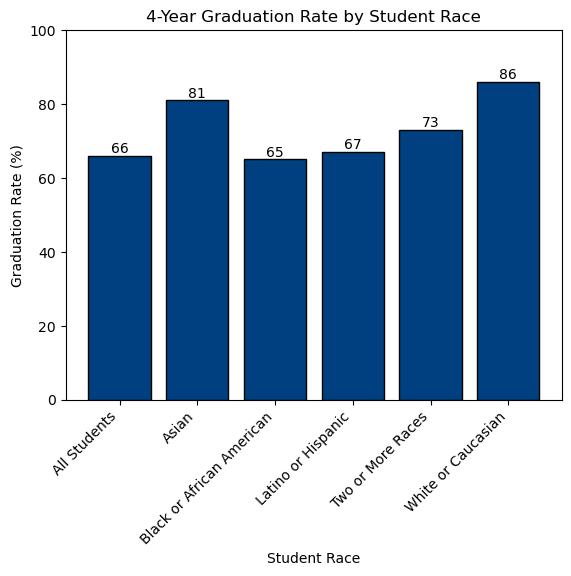

In [167]:
x=('All Students','Asian','Black or African American','Latino or Hispanic','Two or More Races','White or Caucasian')
y=(66,81,65,67,73,86)
race_bar=plt.bar(x=x,height=y,fc='#004080',ec="black")
plt.bar_label(race_bar,labels=y,label_type="edge")
plt.xlabel('Student Race')
plt.ylabel('Graduation Rate (%)')
plt.title('4-Year Graduation Rate by Student Race')
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0,100) 
plt.show()

# Graduation rate by gender

In [168]:
average_rate_by_gender = df.groupby('gender')['graduate_rate'].mean()

In [169]:
print(average_rate_by_gender)

gender
female    72.917615
male      60.323710
trans     66.666667
Name: graduate_rate, dtype: float64


In [170]:
gender_table = pd.DataFrame(average_rate_by_gender)

# Removing trans students from the analysis 

In [171]:
gender_table = gender_table.query('gender != "trans"')

In [172]:
gender_table

,graduate_rate
gender,
female,72.917615
male,60.323710


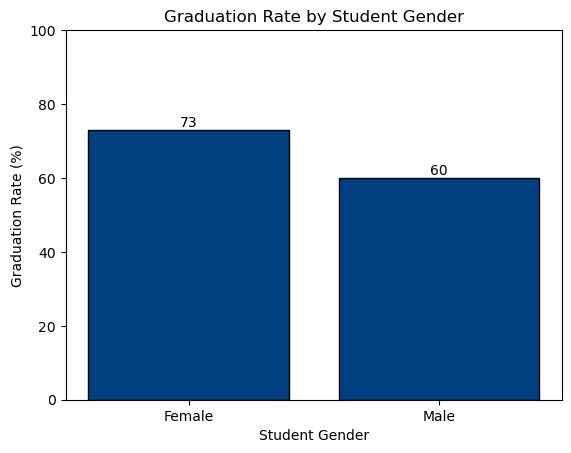

In [173]:
x=('Female','Male')
y=(73,60)
gender_bar=plt.bar(x=x,height=y,fc='#004080',ec="black")
plt.bar_label(gender_bar,labels=y,label_type="edge")
plt.xlabel('Student Gender')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rate by Student Gender')
plt.ylim(0,100) 
plt.show()

# Graduation rate by ELL status

In [174]:
average_rate_by_ell = df.groupby('ell_part')['graduate_rate'].mean()

In [175]:
print(average_rate_by_ell)

ell_part
NO     66.982277
YES    61.035422
Name: graduate_rate, dtype: float64


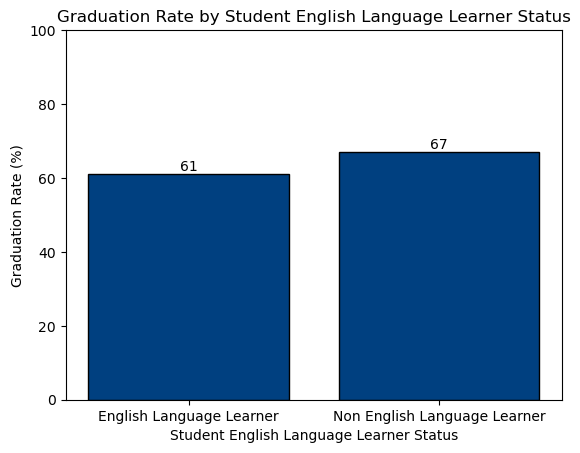

In [176]:
x=('English Language Learner','Non English Language Learner')
y=(61,67)
ell_bar=plt.bar(x=x,height=y,fc='#004080',ec="black")
plt.bar_label(ell_bar,labels=y,label_type="edge")
plt.xlabel('Student English Language Learner Status')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rate by Student English Language Learner Status')
plt.ylim(0,100) 
plt.show()

# Graduation rate by special education status

In [177]:
average_rate_by_sped = df.groupby('special_ed')['graduate_rate'].mean()

In [178]:
print(average_rate_by_sped)

special_ed
NO     72.473669
YES    44.912641
Name: graduate_rate, dtype: float64


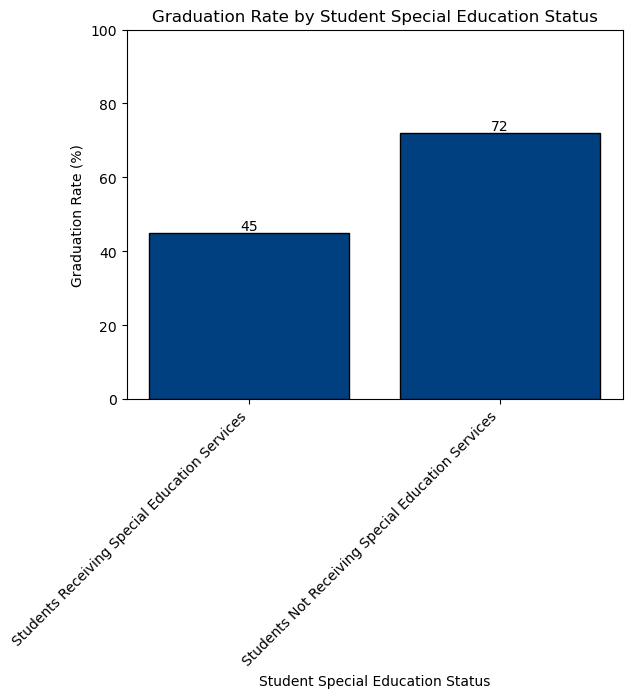

In [179]:
x=('Students Receiving Special Education Services','Students Not Receiving Special Education Services')
y=(45,72)
ell_bar=plt.bar(x=x,height=y,fc='#004080',ec="black")
plt.bar_label(ell_bar,labels=y,label_type="edge")
plt.xlabel('Student Special Education Status')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rate by Student Special Education Status')
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0,100) 
plt.show()

# Graduation rate by at risk designation

In [180]:
average_rate_by_atrisk = df.groupby('At Risk')['graduate_rate'].mean()

In [181]:
print(average_rate_by_atrisk)

At Risk
NO     64.129032
YES    66.990030
Name: graduate_rate, dtype: float64


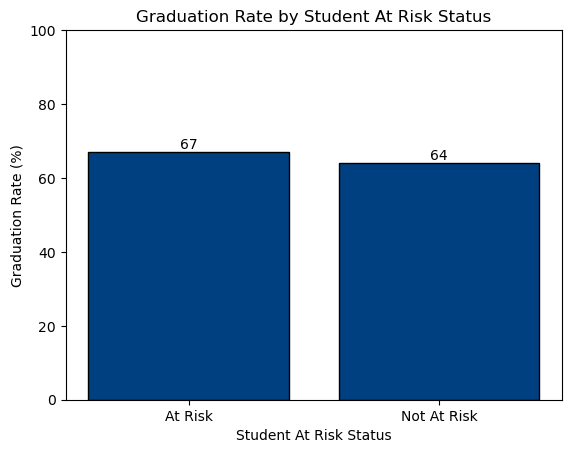

In [182]:
x=('At Risk','Not At Risk')
y=(67,64)
ell_bar=plt.bar(x=x,height=y,fc='#004080',ec="black")
plt.bar_label(ell_bar,labels=y,label_type="edge")
plt.xlabel('Student At Risk Status')
plt.ylabel('Graduation Rate (%)')
plt.title('Graduation Rate by Student At Risk Status')
plt.ylim(0,100) 
plt.show()

# Graduation rate by gender and race

In [183]:
average_rate_by_gender_race = df.groupby('gender_race')['graduate_rate'].mean()

In [184]:
print(average_rate_by_gender_race)

gender_race
femaleAmerican Indian or Alaska Native        50.000000
femaleAsian                                   87.500000
femaleBlack or African American               71.757440
femaleLatino or Hispanic                      74.218750
femaleNative Hawaiian or Pacific Islander    100.000000
femaleTwo or More Races                       65.000000
femaleWhite or Caucasian                      86.538462
maleAmerican Indian or Alaska Native         100.000000
maleAsian                                     75.000000
maleBlack or African American                 58.570661
maleLatino or Hispanic                        60.507246
maleNative Hawaiian or Pacific Islander       66.666667
maleTwo or More Races                         80.000000
maleWhite or Caucasian                        84.946237
transBlack or African American                50.000000
transLatino or Hispanic                      100.000000
Name: graduate_rate, dtype: float64


In [185]:
average_rate_by_gender_race_table = pd.DataFrame(average_rate_by_gender_race)

In [186]:
average_rate_by_gender_race_table = average_rate_by_gender_race_table.query('gender_race != "femaleAmerican Indian or Alaska Native"')

In [187]:
average_rate_by_gender_race_table = average_rate_by_gender_race_table.query('gender_race != "femaleNative Hawaiian or Pacific Islander"')

In [188]:
average_rate_by_gender_race_table = average_rate_by_gender_race_table.query('gender_race != "maleAmerican Indian or Alaska Native"')

In [189]:
average_rate_by_gender_race_table = average_rate_by_gender_race_table.query('gender_race != "maleNative Hawaiian or Pacific Islander"')

In [190]:
average_rate_by_gender_race_table = average_rate_by_gender_race_table.query('gender_race != "transBlack or African American"')

In [191]:
average_rate_by_gender_race_table = average_rate_by_gender_race_table.query('gender_race != "transLatino or Hispanic"')

In [192]:
print(average_rate_by_gender_race_table)

                                 graduate_rate
gender_race                                   
femaleAsian                          87.500000
femaleBlack or African American      71.757440
femaleLatino or Hispanic             74.218750
femaleTwo or More Races              65.000000
femaleWhite or Caucasian             86.538462
maleAsian                            75.000000
maleBlack or African American        58.570661
maleLatino or Hispanic               60.507246
maleTwo or More Races                80.000000
maleWhite or Caucasian               84.946237


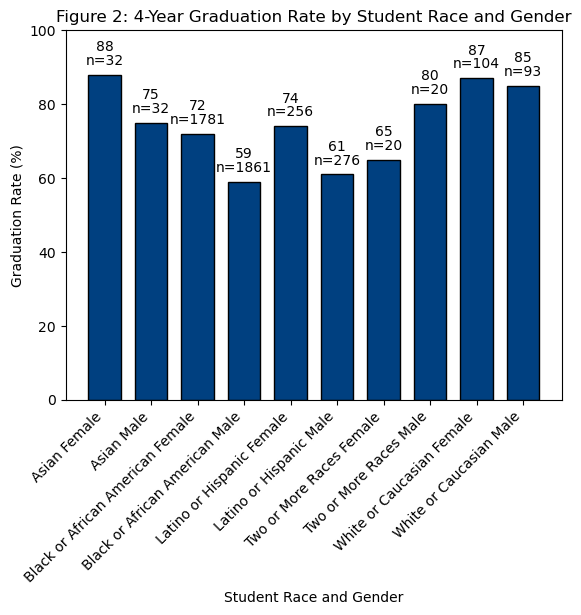

In [193]:
x=('Asian Female','Asian Male','Black or African American Female','Black or African American Male','Latino or Hispanic Female','Latino or Hispanic Male','Two or More Races Female','Two or More Races Male','White or Caucasian Female','White or Caucasian Male')
y=(88,75,72,59,74,61,65,80,87,85)
gender_race_bar=plt.bar(x=x,height=y,fc='#004080',ec="black",width=.7)
plt.bar_label(gender_race_bar,labels=y,label_type="edge",padding=15)
plt.bar_label(gender_race_bar,labels=['n=32','n=32','n=1781','n=1861','n=256','n=276','n=20','n=20','n=104','n=93'],label_type="edge",padding=5)
plt.xlabel('Student Race and Gender')
plt.ylabel('Graduation Rate (%)')
plt.title('Figure 2: 4-Year Graduation Rate by Student Race and Gender')
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0,100) 
plt.show()

# Graduation rates by race & at risk status

In [194]:
average_rate_by_race_atrisk = df.groupby('race_atrisk')['graduate_rate'].mean()

In [195]:
print(average_rate_by_race_atrisk)

race_atrisk
American Indian or Alaska NativeNO          0.000000
American Indian or Alaska NativeYES       100.000000
AsianNO                                    94.444444
AsianYES                                   76.086957
Black or African AmericanNO                57.082452
Black or African AmericanYES               66.193630
Latino or HispanicNO                       47.252747
Latino or HispanicYES                      71.266968
Native Hawaiian or Pacific IslanderNO      66.666667
Native Hawaiian or Pacific IslanderYES    100.000000
Two or More RacesNO                        80.952381
Two or More RacesYES                       63.157895
White or CaucasianNO                       88.095238
White or CaucasianYES                      72.413793
Name: graduate_rate, dtype: float64


In [196]:
average_rate_by_race_atrisk_table = pd.DataFrame(average_rate_by_race_atrisk)

In [197]:
average_rate_by_race_atrisk_table = average_rate_by_race_atrisk_table.query('race_atrisk != "American Indian or Alaska NativeNO"')

In [198]:
average_rate_by_race_atrisk_table = average_rate_by_race_atrisk_table.query('race_atrisk != "American Indian or Alaska NativeYES"')

In [199]:
average_rate_by_race_atrisk_table = average_rate_by_race_atrisk_table.query('race_atrisk != "Native Hawaiian or Pacific IslanderNO"')

In [200]:
average_rate_by_race_atrisk_table = average_rate_by_race_atrisk_table.query('race_atrisk != "Native Hawaiian or Pacific IslanderYES"')

In [201]:
print(average_rate_by_race_atrisk_table)

                              graduate_rate
race_atrisk                                
AsianNO                           94.444444
AsianYES                          76.086957
Black or African AmericanNO       57.082452
Black or African AmericanYES      66.193630
Latino or HispanicNO              47.252747
Latino or HispanicYES             71.266968
Two or More RacesNO               80.952381
Two or More RacesYES              63.157895
White or CaucasianNO              88.095238
White or CaucasianYES             72.413793


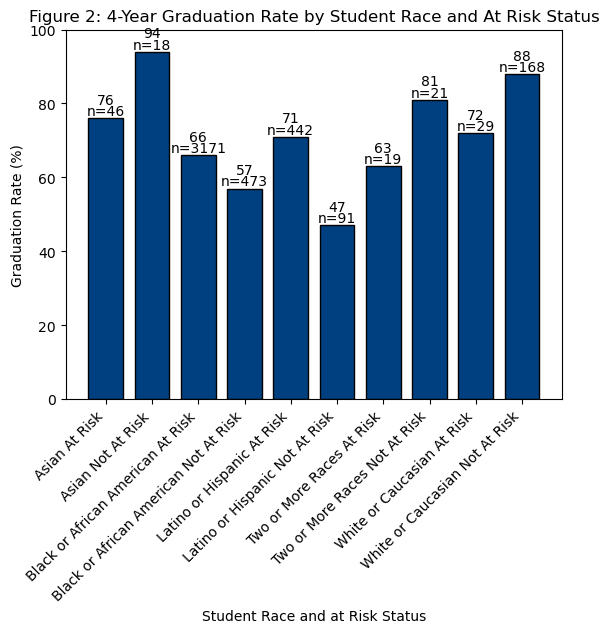

In [202]:
x=('Asian At Risk','Asian Not At Risk','Black or African American At Risk','Black or African American Not At Risk','Latino or Hispanic At Risk', 'Latino or Hispanic Not At Risk', 'Two or More Races At Risk', 'Two or More Races Not At Risk','White or Caucasian At Risk', 'White or Caucasian Not At Risk')
y=(76,94,66,57,71,47,63,81,72,88)
race_atrisk_bar=plt.bar(x=x,height=y,fc='#004080',ec="black",width=.75)
plt.bar_label(race_atrisk_bar,labels=y,label_type="edge",padding=8)
plt.bar_label(race_atrisk_bar,labels=['n=46','n=18','n=3171','n=473','n=442','n=91','n=19','n=21','n=29','n=168'],label_type="edge")
plt.xlabel('Student Race and at Risk Status')
plt.ylabel('Graduation Rate (%)')
plt.title('Figure 2: 4-Year Graduation Rate by Student Race and At Risk Status')
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0,100) 
plt.show()

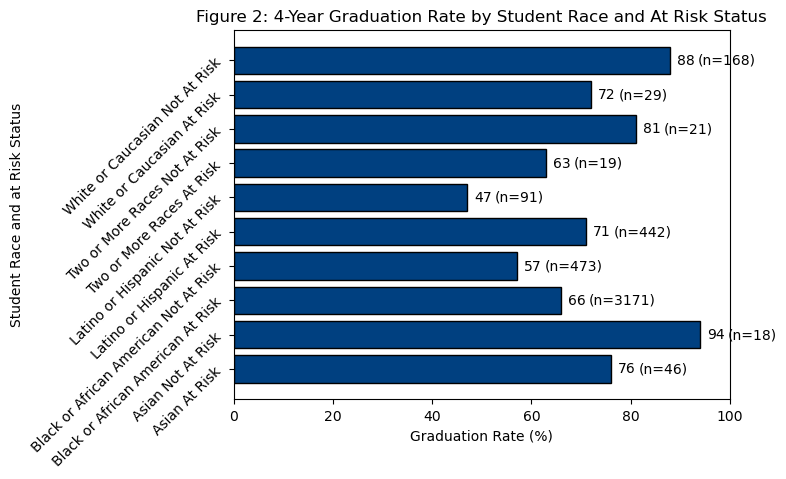

In [211]:
x=('Asian At Risk','Asian Not At Risk','Black or African American At Risk','Black or African American Not At Risk','Latino or Hispanic At Risk', 'Latino or Hispanic Not At Risk', 'Two or More Races At Risk', 'Two or More Races Not At Risk','White or Caucasian At Risk', 'White or Caucasian Not At Risk')
y=(76,94,66,57,71,47,63,81,72,88)
race_atrisk_bar=plt.barh(y=x,width=y,fc='#004080',ec="black")
plt.bar_label(race_atrisk_bar,labels=y,label_type="edge",padding=5)
plt.bar_label(race_atrisk_bar,labels=['(n=46)','(n=18)','(n=3171)','(n=473)','(n=442)','(n=91)','(n=19)','(n=21)','(n=29)','(n=168)'],label_type="edge", padding=20)
plt.ylabel('Student Race and at Risk Status')
plt.xlabel('Graduation Rate (%)')
plt.title('Figure 2: 4-Year Graduation Rate by Student Race and At Risk Status')
plt.yticks(rotation=45,ha='right')  # Rotate x-axis labels for better readability
plt.xlim(0,100) 
plt.show()

# Graduation rate by student group

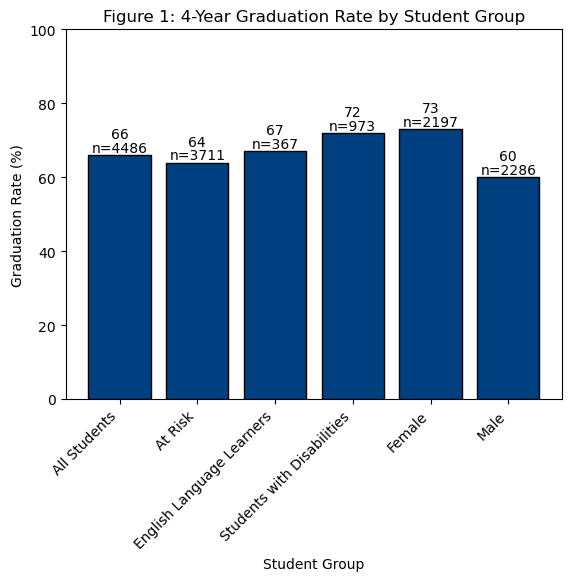

In [206]:
x = ['All Students','At Risk','English Language Learners','Students with Disabilities','Female','Male']
y = [66,64,67,72,73,60]
group_grad_bar=plt.bar(x=x,height=y,fc='#004080',ec="black")
plt.bar_label(group_grad_bar,labels=y,label_type="edge",padding=10)
plt.bar_label(group_grad_bar,labels= ['n=4486','n=3711','n=367','n=973','n=2197','n=2286'],label_type="edge")
plt.xlabel('Student Group')
plt.ylabel('Graduation Rate (%)')
plt.title('Figure 1: 4-Year Graduation Rate by Student Group')
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0,100) 
plt.show()

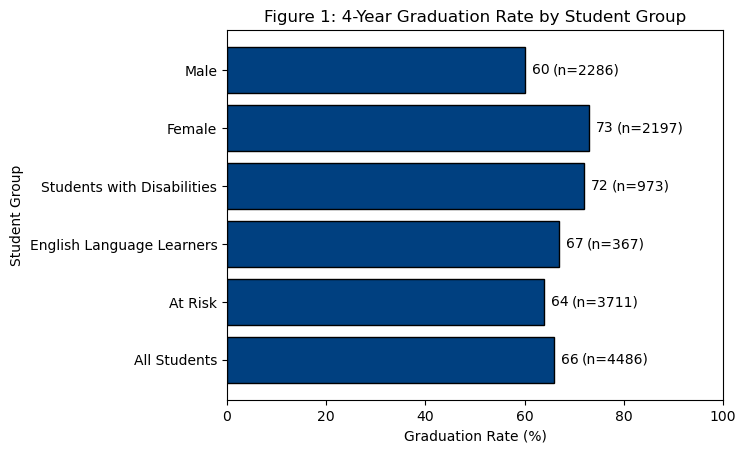

In [208]:
x = ['All Students', 'At Risk', 'English Language Learners', 'Students with Disabilities', 'Female', 'Male']
y = [66, 64, 67, 72, 73, 60]

group_grad_bar = plt.barh(y=x, width=y, color='#004080', edgecolor="black")
plt.bar_label(group_grad_bar, labels=y, label_type="edge",padding=5)
plt.bar_label(group_grad_bar, labels=['(n=4486)', '(n=3711)', '(n=367)', '(n=973)', '(n=2197)', '(n=2286)'], label_type="edge",padding=20)
plt.ylabel('Student Group')
plt.xlabel('Graduation Rate (%)')
plt.title('Figure 1: 4-Year Graduation Rate by Student Group')
plt.xlim(0, 100)
plt.show()